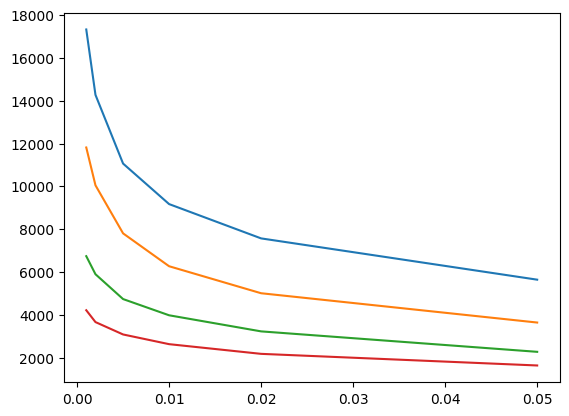

In [3]:
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_compression_ratios(A):
    B = np.mean(A, -1)
    Bt = np.fft.fft2(B)
    Bt_sorted = np.sort(np.abs(Bt), axis=None)
    compression_ratios = [0.05, 0.02, 0.01, 0.005, 0.002, 0.001]
    error = []

    for keep_fraction in compression_ratios:
        thresh = Bt_sorted[int(np.floor((1 - keep_fraction) * len(Bt_sorted)))]
        ind = np.abs(Bt) > thresh
        Atlow = Bt * ind
        Alow = np.fft.ifft2(Atlow).real
        error.append(np.linalg.norm(B - Alow))

    plt.plot(compression_ratios, error)

image = Image.open(os.path.join('..', 'DATA', 'dog.jpg'))
resolutions = [(1000, 750), (500, 375), (200, 150), (100, 75)]
for resolution in resolutions:
    downsampled_image = image.resize(resolution)
    plot_compression_ratios(downsampled_image)